<h1>Импорт библиотек

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import unittest

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [11]:
def sum_prod(X, V):
    if len(X) != len(V):
        raise ValueError("Количество матриц и векторов должно быть одинаковым.")
    
    result = np.zeros_like(V[0])

    for i in range(len(X)):
        result += np.dot(X[i], V[i]) 

    return result

class TestSumProd(unittest.TestCase):
    
    def test_simple_case(self):
        X = [
            np.array([[1, 2], [3, 4]]),
            np.array([[5, 6], [7, 8]])
        ]
        V = [
            np.array([[1], [0]]),
            np.array([[0], [1]])
        ]
        result = sum_prod(X, V)
        expected_result = np.array([[7], [11]])
        np.testing.assert_array_equal(result, expected_result)

    def test_single_matrix_vector(self):
        X = [np.array([[2, 0], [0, 2]])]
        V = [np.array([[1], [1]])]
        result = sum_prod(X, V)
        expected_result = np.array([[2], [2]])
        np.testing.assert_array_equal(result, expected_result)

    def test_zero_case(self):
        X = [np.array([[0, 0], [0, 0]])]
        V = [np.array([[0], [0]])]
        result = sum_prod(X, V)
        expected_result = np.array([[0], [0]])
        np.testing.assert_array_equal(result, expected_result)

    def test_incorrect_input(self):
        X = [np.array([[1, 2], [3, 4]])]
        V = [np.array([[1], [0]]), np.array([[0], [1]])]
        with self.assertRaises(ValueError):
            sum_prod(X, V)
            
suite = unittest.TestLoader().loadTestsFromTestCase(TestSumProd)
runner = unittest.TextTestRunner()
runner.run(suite)

....
----------------------------------------------------------------------
Ran 4 tests in 0.003s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [12]:
def binarize(M, threshold=0.5):
    return (M >= threshold).astype(int)

class TestBinarize(unittest.TestCase):
    def test_default_threshold(self):
        M = np.array([[0.2, 0.7], [0.4, 0.9]])
        result = binarize(M)
        expected_result = np.array([[0, 1], [0, 1]])
        np.testing.assert_array_equal(result, expected_result)

    def test_custom_threshold(self):
        M = np.array([[0.2, 0.7], [0.4, 0.9]])
        result = binarize(M, threshold=0.4)
        expected_result = np.array([[0, 1], [1, 1]])
        np.testing.assert_array_equal(result, expected_result)

    def test_all_zeros(self):
        M = np.array([[0.1, 0.2], [0.3, 0.4]])
        result = binarize(M, threshold=0.5)
        expected_result = np.array([[0, 0], [0, 0]])
        np.testing.assert_array_equal(result, expected_result)

    def test_all_ones(self):
        M = np.array([[0.6, 0.7], [0.8, 0.9]])
        result = binarize(M, threshold=0.5)
        expected_result = np.array([[1, 1], [1, 1]])
        np.testing.assert_array_equal(result, expected_result)

    def test_empty_matrix(self):
        M = np.array([[]])
        result = binarize(M)
        expected_result = np.array([[]])
        np.testing.assert_array_equal(result, expected_result)
        
suite = unittest.TestLoader().loadTestsFromTestCase(TestBinarize)
runner = unittest.TextTestRunner()
runner.run(suite)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.004s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [15]:
def unique_rows(mat):
    if mat.size == 0:
        return []
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    if mat.size == 0:
        return []
    return [np.unique(mat[:, col]) for col in range(mat.shape[1])]

class TestUniqueFunctions(unittest.TestCase):
    def test_unique_rows(self):
        mat = np.array([[1, 2, 2], [3, 3, 3], [4, 4, 5]])
        result = unique_rows(mat)
        expected_result = [np.array([1, 2]), np.array([3]), np.array([4, 5])]
        for res, exp in zip(result, expected_result):
            np.testing.assert_array_equal(res, exp)

    def test_unique_columns(self):
        mat = np.array([[1, 2, 2], [1, 3, 3], [4, 4, 5]])
        result = unique_columns(mat)
        expected_result = [np.array([1, 4]), np.array([2, 3, 4]), np.array([2, 3, 5])]
        for res, exp in zip(result, expected_result):
            np.testing.assert_array_equal(res, exp)

    def test_empty_matrix(self):
        mat = np.array([[]])
        result_rows = unique_rows(mat)
        result_columns = unique_columns(mat)
        self.assertEqual(result_rows, [])
        self.assertEqual(result_columns, [])

suite = unittest.TestLoader().loadTestsFromTestCase(TestUniqueFunctions)
runner = unittest.TextTestRunner()
runner.run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 0.003s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

In [18]:
def analyze_matrix(m, n):
    matrix = np.random.randn(m, n)
    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)
    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0)
    
    print("Математическое ожидание для строк:", row_means)
    print("Дисперсия для строк:", row_vars)
    print("Математическое ожидание для столбцов:", col_means)
    print("Дисперсия для столбцов:", col_vars)

    for i in range(m):
        plt.figure(figsize=(5, 3))
        plt.hist(matrix[i, :], bins=10, alpha=0.75, color='blue')
        plt.title(f'Гистограмма для строки {i+1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.show()

    for j in range(n):
        plt.figure(figsize=(5, 3))
        plt.hist(matrix[:, j], bins=10, alpha=0.75, color='green')
        plt.title(f'Гистограмма для столбца {j+1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.show()

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [20]:
def chess(m, n, a, b):
    matrix = np.zeros((m, n), dtype=int)
    
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
    
    return matrix

class TestChessMatrix(unittest.TestCase):
    def test_3x3(self):
        result = chess(3, 3, 1, 0)
        expected_result = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
        np.testing.assert_array_equal(result, expected_result)

    def test_2x4(self):
        result = chess(2, 4, 2, 3)
        expected_result = np.array([[2, 3, 2, 3], [3, 2, 3, 2]])
        np.testing.assert_array_equal(result, expected_result)

    def test_1x1(self):
        result = chess(1, 1, 5, 8)
        expected_result = np.array([[5]])
        np.testing.assert_array_equal(result, expected_result)

    def test_4x4(self):
        result = chess(4, 4, 7, 9)
        expected_result = np.array([[7, 9, 7, 9], [9, 7, 9, 7], [7, 9, 7, 9], [9, 7, 9, 7]])
        np.testing.assert_array_equal(result, expected_result)

    def test_0x0(self):
        result = chess(0, 0, 1, 0)
        expected_result = np.empty((0, 0), dtype=int)
        np.testing.assert_array_equal(result, expected_result)
        
suite = unittest.TestLoader().loadTestsFromTestCase(TestChessMatrix)
runner = unittest.TextTestRunner()
runner.run(suite)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.004s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

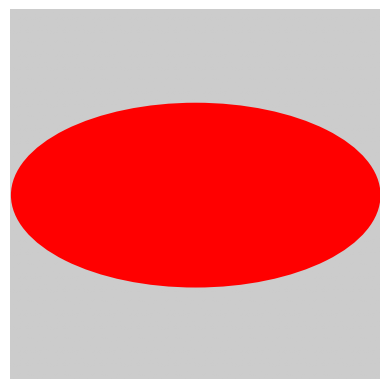

.

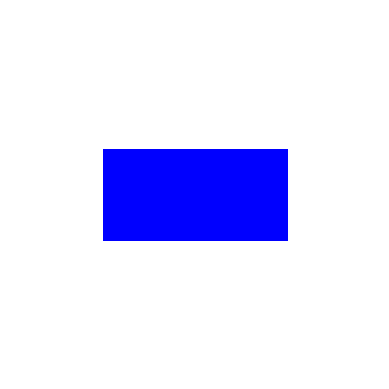

.
----------------------------------------------------------------------
Ran 2 tests in 0.065s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

In [23]:
from matplotlib.patches import Rectangle, Ellipse


def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.ones((m, n, 3), dtype=np.float32) * np.array(background_color)
    fig, ax = plt.subplots()
    ax.imshow(image)
    rect = Rectangle(((n - b) // 2, (m - a) // 2), b, a, linewidth=1, edgecolor='none', facecolor=rectangle_color)
    ax.add_patch(rect)
    ax.axis('off')
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.ones((m, n, 3), dtype=np.float32) * np.array(background_color)
    fig, ax = plt.subplots()
    ax.imshow(image)
    ellipse = Ellipse((n // 2, m // 2), b * 2, a * 2, linewidth=1, edgecolor='none', facecolor=ellipse_color)
    ax.add_patch(ellipse)
    ax.axis('off')
    plt.show()
    
class TestDrawFunctions(unittest.TestCase):  
    def test_rectangle(self):
        try:
            draw_rectangle(50, 100, 200, 200, rectangle_color=(0, 0, 1), background_color=(1, 1, 1))
        except Exception as e:
            self.fail(f"Отрисовка прямоугольника вызвала ошибку: {e}")
    
    def test_ellipse(self):
        try:
            draw_ellipse(50, 100, 200, 200, ellipse_color=(1, 0, 0), background_color=(0.8, 0.8, 0.8))
        except Exception as e:
            self.fail(f"Отрисовка эллипса вызвала ошибку: {e}")
            
suite = unittest.TestLoader().loadTestsFromTestCase(TestDrawFunctions)
runner = unittest.TextTestRunner()
runner.run(suite)

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

Математическое ожидание: 5.6
Дисперсия: 6.506666666666667
Стандартное отклонение: 2.5508168626278653
Локальные максимумы (индексы): [ 1  4  6 13], значения: [ 3  7  8 10]
Локальные минимумы (индексы): [ 2  5 10], значения: [2 6 3]
Скользящее среднее: [2.         3.33333333 4.66666667 6.         7.         7.
 6.66666667 5.33333333 4.         4.33333333 5.66666667 8.
 9.        ]


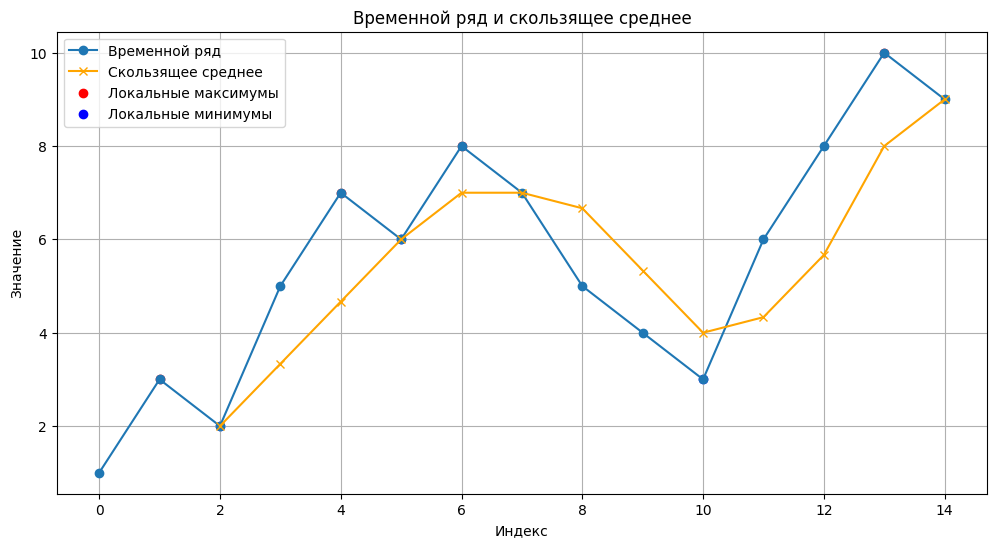

In [31]:
def analyze_time_series(time_series, p):
    time_series = np.array(time_series)
    mean = np.mean(time_series)
    variance = np.var(time_series)
    std_dev = np.std(time_series)
    
    local_maxima = (time_series[1:-1] > time_series[:-2]) & (time_series[1:-1] > time_series[2:])
    local_minima = (time_series[1:-1] < time_series[:-2]) & (time_series[1:-1] < time_series[2:])
    local_maxima_indices = np.where(local_maxima)[0] + 1
    local_minima_indices = np.where(local_minima)[0] + 1
    
    moving_average = np.convolve(time_series, np.ones(p) / p, mode='valid')
    
    results = {
        'mean': mean,
        'variance': variance,
        'std_dev': std_dev,
        'local_maxima_indices': local_maxima_indices,
        'local_maxima_values': time_series[local_maxima_indices],
        'local_minima_indices': local_minima_indices,
        'local_minima_values': time_series[local_minima_indices],
        'moving_average': moving_average
    }

    print(f"Математическое ожидание: {mean}")
    print(f"Дисперсия: {variance}")
    print(f"Стандартное отклонение: {std_dev}")
    print(f"Локальные максимумы (индексы): {local_maxima_indices}, значения: {time_series[local_maxima_indices]}")
    print(f"Локальные минимумы (индексы): {local_minima_indices}, значения: {time_series[local_minima_indices]}")
    print(f"Скользящее среднее: {moving_average}")

    plt.figure(figsize=(12, 6))
    plt.plot(time_series, label='Временной ряд', marker='o')
    plt.plot(range(p - 1, len(time_series)), moving_average, label='Скользящее среднее', color='orange', marker='x')
    plt.scatter(local_maxima_indices, time_series[local_maxima_indices], color='red', label='Локальные максимумы')
    plt.scatter(local_minima_indices, time_series[local_minima_indices], color='blue', label='Локальные минимумы')
    plt.title('Временной ряд и скользящее среднее')
    plt.xlabel('Индекс')
    plt.ylabel('Значение')
    plt.legend()
    plt.grid()
    plt.show()

    return results

time_series_data = [1, 3, 2, 5, 7, 6, 8, 7, 5, 4, 3, 6, 8, 10, 9] # Пример
window_size = 3
results = analyze_time_series(time_series_data, window_size)

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [34]:
def one_hot_encoding(labels):
    labels = np.array(labels)
    num_classes = np.max(labels) + 1

    one_hot_encoded = np.zeros((len(labels), num_classes))
    one_hot_encoded[np.arange(len(labels)), labels] = 1

    return one_hot_encoded

labels = [0, 2, 3, 0]
one_hot_encoded = one_hot_encoding(labels)

print("Original:", labels)
print("One-hot encoding:", one_hot_encoded, sep = '\n')

Original: [0, 2, 3, 0]
One-hot encoding:
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
